<a href="https://colab.research.google.com/github/Beekay-5/Data-storytelling-project/blob/main/Webscraping2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
data = requests.get("https://weather.com/weather/tenday/l/Lagos+Lagos+Nigeria?canonicalCityId=9ca5c5697bb09a5980eac509c83a5aff6c740ba23156ee4292631380302bcca0")
data

<Response [200]>

b'<!doctype html><html dir="ltr" lang="en-US"><head>\n      <meta data-react-helmet="true" charset="utf-8"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1, viewport-fit=cover"/><meta data-react-helmet="true" name="robots" content="max-image-preview:large"/><meta data-react-helmet="true" name="robots" content="index, follow"/><meta data-react-helmet="true" name="referrer" content="origin"/><meta data-react-helmet="true" name="description" content="Be prepared with the most accurate 10-day forecast for Lagos, Lagos, Nigeria with highs, lows, chance of precipitation from The Weather Channel and Weather.com"/><meta data-react-helmet="true" name="msapplication-TileColor" content="#ffffff"/><meta data-react-helmet="true" name="msapplication-TileImage" content="/daily/assets/ms-icon-144x144.d353af.png"/><meta data-react-helmet="true" name="theme-color" content="#ffffff"/><meta data-react-helmet="true" name="apple-itunes-app" content="app-id=2956464
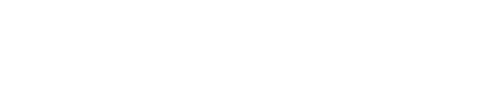
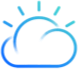

In [ ]:
data.content

In [ ]:
soup = BeautifulSoup(data.content, "html.parser")
soup

In [ ]:
list(soup.children)

In [ ]:
for item in list(soup.children):
  print(type(item))

<class 'bs4.element.Doctype'>
<class 'bs4.element.Tag'>


In [ ]:
html = list(soup.children)[1]
list(html.children)

In [ ]:
body = list(html.children)[1]
list(body.children)
body.prettify()

In [ ]:
days = soup.find(class_="DailyForecast--DisclosureList--msYIJ")
forecast_items = days.find_all(class_="DaypartDetails--DayPartDetail--1up3g Disclosure--themeList--25Q0H")
print(forecast_items)

[<details class="DaypartDetails--DayPartDetail--1up3g Disclosure--themeList--25Q0H" data-testid="ExpandedDetailsCard" data-track-string="false" id="detailIndex0" open=""><summary class="Disclosure--Summary--UuybP DaypartDetails--Summary--3IBUr Disclosure--positionShowOpenSummaryContainer--Qou6d Disclosure--hideBorderOnSummaryOpen--ZdSDc"><div class="DaypartDetails--DetailSummaryContent--3uxcj Disclosure--SummaryDefault--3xAWB Disclosure--positionShowOpenSummary--C1hiI"><div class="Accessibility--visuallyHidden--2uGW3"><div class="DetailsSummary--DetailsSummary--2HluQ DetailsSummary--fadeOnOpen--vFCc_" data-testid="DetailsSummary"><h3 class="DetailsSummary--daypartName--2FBp2" data-testid="daypartName">Today</h3><div class="DetailsSummary--temperature--1Syw3" data-testid="detailsTemperature"><span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">85°</span><span data-testid="lowTempValue">/<span class="DetailsSummary--lowTempValue--3H-7I" data-testid="Temperatu

In [ ]:
Today = forecast_items[0]
print(Today.prettify())

<details class="DaypartDetails--DayPartDetail--1up3g Disclosure--themeList--25Q0H" data-testid="ExpandedDetailsCard" data-track-string="false" id="detailIndex0" open="">
 <summary class="Disclosure--Summary--UuybP DaypartDetails--Summary--3IBUr Disclosure--positionShowOpenSummaryContainer--Qou6d Disclosure--hideBorderOnSummaryOpen--ZdSDc">
  <div class="DaypartDetails--DetailSummaryContent--3uxcj Disclosure--SummaryDefault--3xAWB Disclosure--positionShowOpenSummary--C1hiI">
   <div class="Accessibility--visuallyHidden--2uGW3">
    <div class="DetailsSummary--DetailsSummary--2HluQ DetailsSummary--fadeOnOpen--vFCc_" data-testid="DetailsSummary">
     <h3 class="DetailsSummary--daypartName--2FBp2" data-testid="daypartName">
      Today
     </h3>
     <div class="DetailsSummary--temperature--1Syw3" data-testid="detailsTemperature">
      <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">
       85°
      </span>
      <span data-testid="lowTempValue">
     

In [ ]:
daypart = Today.find(class_="DetailsSummary--daypartName--2FBp2").get_text()
hightemp_val = Today.find(class_="DetailsSummary--highTempValue--3Oteu").get_text()
lowtempval = Today.find(class_="DetailsSummary--lowTempValue--3H-7I").get_text()
ext_data1 = Today.find(class_="DetailsSummary--extendedData--365A_").get_text()
chance_of_rain = Today.find(class_="DailyContent--value--37sk2").get_text()
Wind = Today.find(class_="Wind--windWrapper--3aqXJ DailyContent--value--37sk2").get_text()
Humidity_level = Today.find(class_="DetailsTable--value--1q_qD").get_text()
print(daypart)
print(hightemp_val)
print(lowtempval)
print(ext_data1)
print(chance_of_rain)
print(Wind)
print(Humidity_level)

Today
85°
74°
Partly Cloudy
24%
SSW 11 mph
74%


In [ ]:
daypart_tags = days.select(" .DailyContent--daypartDate--2A3Wi")
dayparts = (daypart, [pt.get_text() for pt in daypart_tags])
dayparts

('Today',
 ['Tue 06',
  'Tue 06',
  'Wed 07',
  'Wed 07',
  'Thu 08',
  'Thu 08',
  'Fri 09',
  'Fri 09',
  'Sat 10',
  'Sat 10',
  'Sun 11',
  'Sun 11',
  'Mon 12',
  'Mon 12',
  'Tue 13',
  'Tue 13',
  'Wed 14',
  'Wed 14',
  'Thu 15',
  'Thu 15',
  'Fri 16',
  'Fri 16',
  'Sat 17',
  'Sat 17',
  'Sun 18',
  'Sun 18',
  'Mon 19',
  'Mon 19',
  'Tue 20',
  'Tue 20'])

In [ ]:
tempval = (hightemp_val, [ht.get_text()for ht in days.select(" .DailyContent--temp--3d4dn")])
ext_data = (ext_data1, [ex.get_text()for ex in days.select(" .DailyContent--weatherIcon--3zguJ Icon--icon--3wCKh Icon--fullTheme--3ns8p")])
chance_of_rain = [rain.get_text()for rain in days.select(" .DailyContent--value--37sk2")]
wind = [w.get_text()for w in days.select(" .Wind--windWrapper--3aqXJ DailyContent--value--37sk2")]
Humidity_level = [hl.get_text()for hl in days.select(" .DetailsTable--value--1q_qD")]
tempval.shape()
ext_data.shape()
chance_of_rain.shape()
wind.shape()
Humidity_level.shape()

AttributeError: ignored

In [ ]:
weather = pd.DataFrame({
    "periods": dayparts,
    "short_desc": ext_data,
    "Temp": tempval,
    "Wind_level": wind,
    "Humidity_level": Humidity_level
})
weather

ValueError: ignored